# </font> <font color = #4854E8> LOGISTIC REGRESSION </font>

Logistic Regression is a Statistical method for analyzing a dataset in which there are one or more independent variables that determine on outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcome).

<b> Information of the data </b>

<b>Ionosphere Data Set: </b>This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.=The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.
Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.
* All 34 are continuous
* The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

https://archive.ics.uci.edu/ml/datasets/Ionosphere

<b> Importing the Libaries </b>

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

<b> Importing the Dataset </b>

In [2]:
df = pd.read_csv('ionosphere.data',sep=',', header=None, prefix='col')

In [3]:
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


<b> Data Information and Visulazation </b>

In [4]:
print('The number of columns:',df.shape[1])
print('The number of rows :',df.shape[0])

The number of columns: 35
The number of rows : 351


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col0    351 non-null    int64  
 1   col1    351 non-null    int64  
 2   col2    351 non-null    float64
 3   col3    351 non-null    float64
 4   col4    351 non-null    float64
 5   col5    351 non-null    float64
 6   col6    351 non-null    float64
 7   col7    351 non-null    float64
 8   col8    351 non-null    float64
 9   col9    351 non-null    float64
 10  col10   351 non-null    float64
 11  col11   351 non-null    float64
 12  col12   351 non-null    float64
 13  col13   351 non-null    float64
 14  col14   351 non-null    float64
 15  col15   351 non-null    float64
 16  col16   351 non-null    float64
 17  col17   351 non-null    float64
 18  col18   351 non-null    float64
 19  col19   351 non-null    float64
 20  col20   351 non-null    float64
 21  col21   351 non-null    float64
 22  co

In [6]:
df.describe()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> Visulazing the taget label </b>

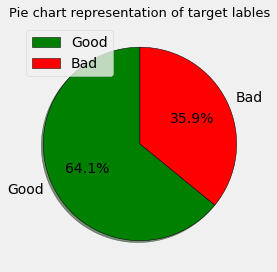

In [7]:
good = df[df['col34'] == 'g'].shape[0]
bad  = df[df['col34'] == 'b'].shape[0]

class_ = [good,bad]
labels = ['Good','Bad']
plt.pie(class_, labels=labels, shadow=True, wedgeprops ={'edgecolor':'black'}
        ,autopct='%4.1f%%', colors=['green','red'],startangle=90)
plt.title('Pie chart representation of target lables',fontsize=13)
plt.legend()
plt.tight_layout()

<b> Data Preprocessing </b>

In [8]:
df.isna().sum()

col0     0
col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
col9     0
col10    0
col11    0
col12    0
col13    0
col14    0
col15    0
col16    0
col17    0
col18    0
col19    0
col20    0
col21    0
col22    0
col23    0
col24    0
col25    0
col26    0
col27    0
col28    0
col29    0
col30    0
col31    0
col32    0
col33    0
col34    0
dtype: int64

In [9]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [10]:
X.head()

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [13]:
Y.head()

0    g
1    b
2    g
3    b
4    g
Name: col34, dtype: object

<b> Spliting the data into train and test </b>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [15]:
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (280, 32)
y_train : (280,)
X_test  : (71, 32)
y_test  : (71,)


<b> Feature Selection with Correlation </b>

In [16]:
X.corr()

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
col2,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,0.325016,0.169981,...,0.304898,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584
col3,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,-0.190090,0.315877,...,-0.104632,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608
col4,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,0.449829,0.042896,...,0.243063,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478
col5,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,-0.291447,0.163933,...,-0.177576,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215
col6,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,0.412876,-0.020395,...,0.286749,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460
col7,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,-0.364003,0.429146,...,-0.179928,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610
col8,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,0.670813,-0.167705,...,0.356564,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597
col9,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,-0.337374,0.441505,...,-0.254785,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104
col10,0.325016,-0.190090,0.449829,-0.291447,0.412876,-0.364003,0.670813,-0.337374,1.000000,-0.217968,...,0.365821,0.131849,0.292281,0.197369,0.396851,0.074600,0.294646,0.023922,0.339506,-0.152225
col11,0.169981,0.315877,0.042896,0.163933,-0.020395,0.429146,-0.167705,0.441505,-0.217968,1.000000,...,-0.233369,-0.076828,-0.227890,0.061292,-0.208294,0.138842,-0.208855,0.010276,-0.181166,0.066584


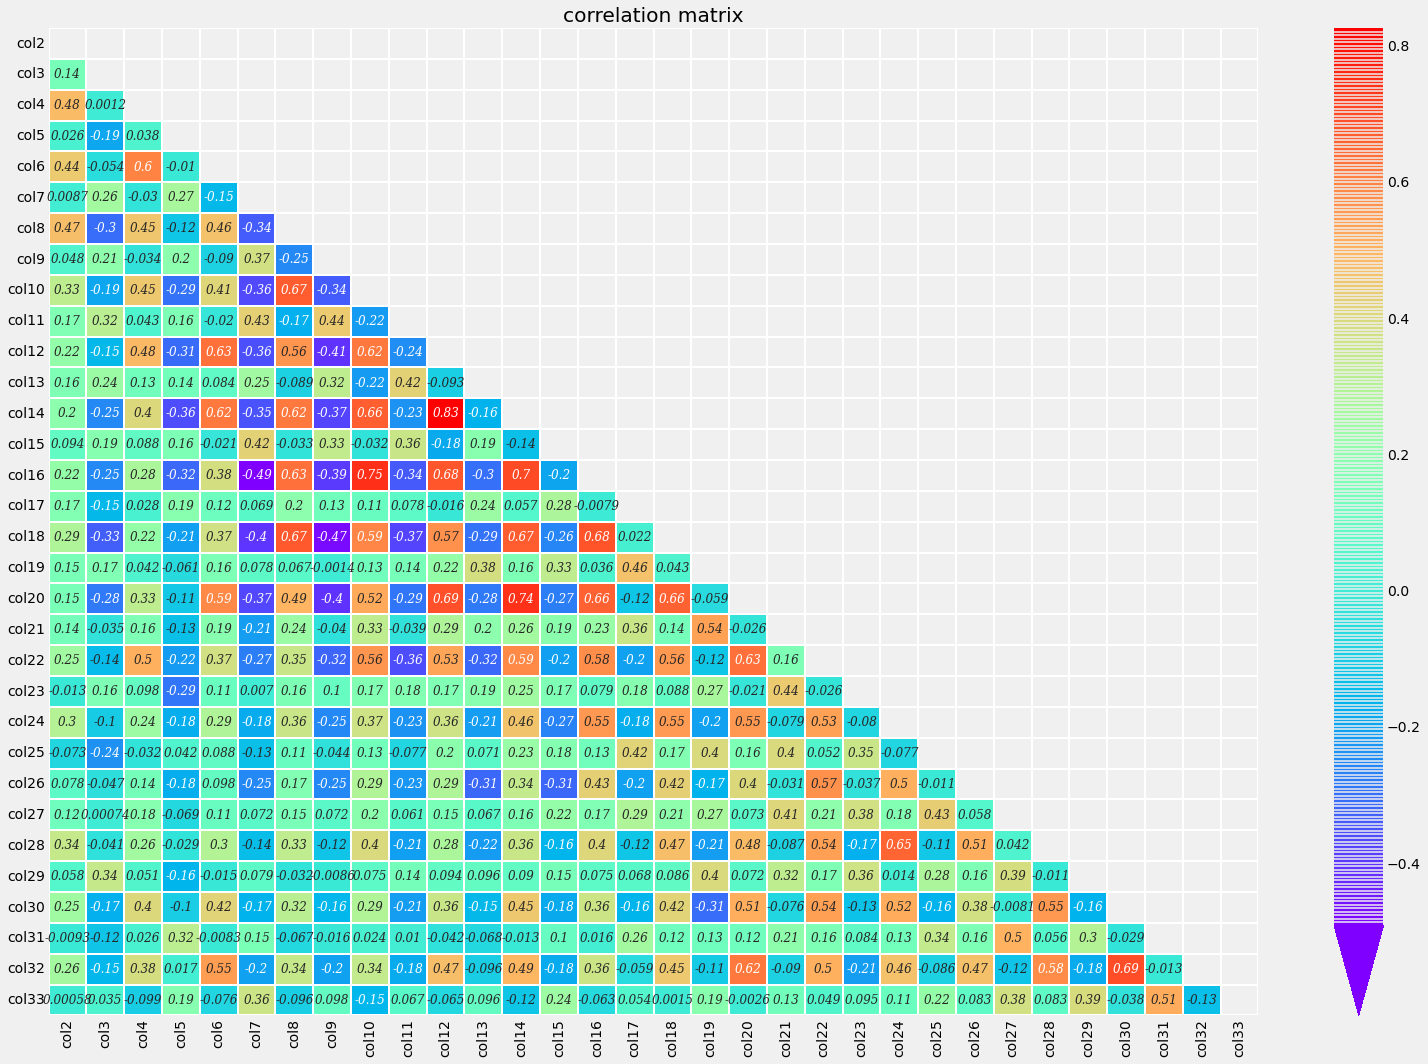

In [17]:
plt.figure(figsize=(22,15))
annot_kws = {'fontsize':12, 'fontstyle':'italic', 'fontfamily':'serif','alpha':1}
cbar_kws = {'shrink':1, 'extend':'min', 'extendfrac':0.1, 'drawedges':True}
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), mask=matrix, annot=True, cmap='rainbow', linewidth=0.2, annot_kws=annot_kws, cbar_kws=cbar_kws)
plt.title('correlation matrix')
plt.tight_layout()

In [18]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(X,0.7)
len(set(corr_features))

3

In [20]:
corr_features

{'col14', 'col16', 'col20'}

In [21]:
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

In [22]:
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (280, 29)
y_train : (280,)
X_test  : (71, 29)
y_test  : (71,)


In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [24]:
le = LabelEncoder()

In [25]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [26]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1])

In [27]:
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.666421,-0.314401,0.653560,-0.710148,0.746774,-0.744497,0.682889,-0.917475,0.555918,-1.299476,...,-0.328480,-1.504689,-0.810503,-1.435035,-0.630298,-1.567059,-0.740709,-1.599992,-0.995077,-1.703023
1,0.714172,2.251875,0.765069,1.944862,0.709640,1.731103,-1.585891,1.683570,-2.457363,1.787006,...,0.857176,-1.873666,0.898257,-1.761427,1.061936,-1.925095,1.122114,-0.675384,1.196517,0.743216
2,0.542986,1.824619,-2.807448,1.944862,-1.988035,0.877325,-0.935680,0.248258,-1.263411,-0.513130,...,-0.730536,0.135399,-1.080846,0.104737,-0.712006,0.108623,-0.664561,0.012362,-0.728771,0.007253
3,-1.265535,-0.068405,-1.300292,-0.252994,-1.172050,-0.197686,0.964142,1.683570,0.930160,1.787006,...,-2.494275,-1.873666,-3.059910,-1.761427,-2.485948,2.142340,1.122114,0.012362,-0.728771,0.007253
4,-1.265535,-0.068405,-1.300292,-0.252994,-1.172050,-0.197686,-1.044233,-0.358997,0.230930,1.787006,...,-0.730483,0.135359,0.898257,0.309567,-0.712006,0.108623,-0.664561,0.012362,-0.728771,0.007253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.601982,0.826620,-0.303487,1.165371,-0.726035,1.297395,-2.167737,0.966609,-2.282080,0.577860,...,0.572200,0.025184,0.108563,0.671752,0.095510,1.339266,-0.615570,1.092559,-1.144094,1.072958
67,0.578502,0.611020,0.350283,0.972443,0.067496,1.183250,-0.517978,1.533462,-0.833663,1.719155,...,-2.197817,-0.806995,-2.370496,-1.193292,-1.443278,-1.634782,-0.907370,-1.850516,-0.536107,-1.995507
68,-3.245241,-2.388685,-1.300292,-0.252994,-1.172050,-0.197686,-1.044233,-0.358997,-0.919409,-0.299456,...,1.033308,-1.873666,0.898257,-1.761427,-0.712006,0.108623,-0.664561,0.012362,-0.728771,0.007253
69,-0.002165,2.251875,-0.870015,-2.450850,0.895514,1.731103,0.717494,0.272585,-2.156512,1.787006,...,0.696794,-1.873666,0.898257,-0.009845,1.061936,2.142340,-0.296255,-1.970415,1.196517,2.119357


<b> Building Logistic Regression </b>

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logistic_regr = LogisticRegression()

In [31]:
logistic_regr.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = logistic_regr.predict(X_test)

In [33]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

<b> Evaluate the results </b>

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

<AxesSubplot:>

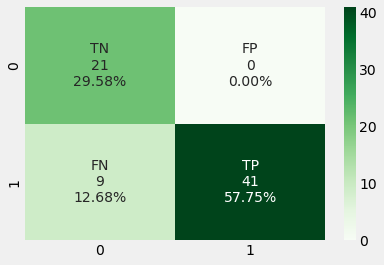

In [38]:
confusion_matrix_Scratch = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

In [39]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc)

Accuracy Score: 0.8732394366197183
Precision Score: 1.0
True positive Rate: 0.82
False positive Rate 0.0
F1 Score: 0.9010989010989011
Specificity: 1.0
Mean Absolute Error: 0.1267605633802817
ROC Area: 0.9099999999999999
